<a href="https://colab.research.google.com/github/ryankemmer/FallDetection/blob/master/FallDetection_Image_Based_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialize Runtime

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#initialize array of categoires
categories = ['Coffee_room_01','Home_01','validation','test']

Mounted at /content/drive


# Load in Image Data

Entering folder Coffee_room_01, which has 20 videos to process
Video 0: Processing 157 frames.
Video 1: Processing 306 frames.
Video 2: Processing 304 frames.
Video 3: Processing 207 frames.
Video 4: Processing 181 frames.
Video 5: Processing 239 frames.
Video 6: Processing 174 frames.
Video 7: Processing 258 frames.
Video 8: Processing 206 frames.
Video 9: Processing 362 frames.
Video 10: Processing 483 frames.
Video 11: Processing 182 frames.
Video 12: Processing 244 frames.
Video 13: Processing 176 frames.
Video 14: Processing 140 frames.
Video 15: Processing 177 frames.
Video 16: Processing 269 frames.
Video 17: Processing 213 frames.
Video 18: Processing 444 frames.
Video 19: Processing 182 frames.
Entering folder Home_01, which has 25 videos to process
Video 0: Processing 264 frames.
Video 1: Processing 240 frames.
Video 2: Processing 240 frames.
Video 3: Processing 240 frames.
Video 4: Processing 192 frames.
Video 5: Processing 192 frames.
Video 6: Processing 216 frames.
Video 7

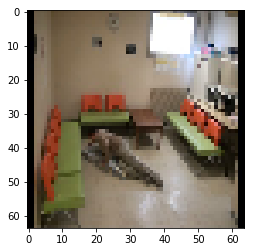

In [5]:
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import numpy as np
from PIL import Image
from keras.utils import np_utils
from skimage.transform import resize
import pandas as pd
import os
import glob
import numpy as np
from keras.utils import np_utils
from keras.utils import to_categorical

#total videos
TotalTrain = 40
TotalTest = 10

#number of samples per activity
A = 20
#of frames per sample (timesteps)
B = 30

X_train = [ ]
X_test = [ ]

Y_train = np.zeros((TotalTrain*A*2,1)) #create empty array for y data
Y_test = np.zeros((TotalTest*A*2,1))

#initialize counters
trainframecount = 0
testframecount = 0

#loop through categories
for i in categories:
  
  if(str(i) == 'test'):
    break
  #count the number of videos in category
  path = '/content/drive/My Drive/Fall Detection/' + str(i) + '/Annotation_files'
  list = os.listdir(path)
  numvideos = len(list)
  
  #change into annotations file folder
  print("Entering folder " + str(i) + ", which has " + str(numvideos) + " videos to process")
  os.chdir(path)
  
  #separate if test dataset
  if (str(i) == 'validation'):
     checker = True
  else:
     checker = False   
    
  #loop through each category
  j = 0
  while (j < 20):
    
    #break if 10+ videos are processed from the validation set
    if(j > 9 and checker == True):
      break
    
    #count the number of frames in each video
    path = '/content/drive/My Drive/Fall Detection/' + str(i) + '/testdata/video' + str(j)
    list = os.listdir(path) 
    numframes = len(list)
    
    #read in frames and determine beginning and ending frames of the fall
    filename = '/content/drive/My Drive/Fall Detection/' + str(i) + '/Annotation_files/video (' + str(j+1) + ').txt'
    dummydata = pd.read_csv(filename, sep=" ", header=None, nrows=2)
    frame1 = dummydata[0][0] 
    frame2 = dummydata[0][1] 
    frame1 = int(frame1) - 5
    frame2 = int(frame2) + 30
    
    #change directory to testdata folder
    path = '/content/drive/My Drive/Fall Detection/' + str(i) + "/testdata/video" + str(j)
    os.chdir(path)
    print("Video " + str(j) + ": Processing " + str(numframes) + " frames.")
        
    #add all frames into array
    k = 0
    vidarray = []
    
    while (k < numframes):
      img = Image.open('frame' + str(k) + '.jpg').resize((64,64))
      img_array = np.array(img)
      vidarray.append(img_array)
      k += 1
      
    videoX = np.array(vidarray)
    
    #split video array into sets for fall, walking, and afterfall
    FallSet = videoX[frame1:frame2,:,:,:]
    WalkSet = videoX[0:frame1-1,:,:,:]
    #AfterFallSet = videoX[frame2+1:len(videoX),:,:,:]  
 
    #capture falls
    for _ in range(A):
      X = []
      idx = np.random.randint(0,len(FallSet)-B)
      X = FallSet[idx:idx+B,:,:,:]
      if (checker == False):
        X_train.append(X)
        Y_train[trainframecount,:] = 0
        trainframecount += 1
      else:
        X_test.append(X)
        Y_test[testframecount,:] = 0
        testframecount += 1
      
    #capture walking
    for _ in range(A):
      X = []
      idx = np.random.randint(0,len(WalkSet)-B)
      X = WalkSet[idx:idx+B,:,:,:]
      if (checker == False):
        X_train.append(X)
        Y_train[trainframecount,:] = 1
        trainframecount += 1
      else:
        X_test.append(X)
        Y_test[testframecount,:] = 1
        testframecount += 1
     
    j += 1   


#load images to np array
X_train = np.array(X_train)
X_test = np.array(X_test)

#verify data works
data = X_train[1,10,:,:,:]
plt.imshow(data)

#reshape Y data to categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print("Finished creating input array.")
print("Total train inputs: " + str(trainframecount))
print("Total test inputs: " +  str(testframecount))

print("X train: " + str(X_train.shape))
print("Y train: " + str(Y_train.shape))
print("X test: " + str(X_test.shape))
print("Y test: " + str(Y_test.shape))
 


# Train CNN/ LSTM Model 

W0711 04:31:31.126686 139946696898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 04:31:31.144464 139946696898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 04:31:31.149111 139946696898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 04:31:31.182371 139946696898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 04:31:31.191155 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 30, 63, 63, 40)    520       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 63, 63, 40)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 62, 62, 40)    6440      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 30, 62, 62, 40)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 31, 31, 40)    0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 30, 38440)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               15416400  
__________

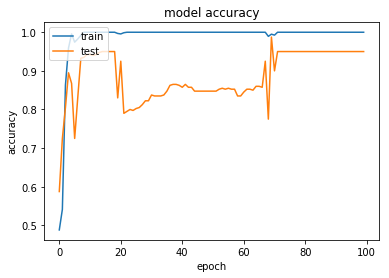

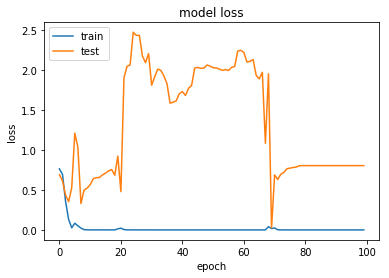

In [4]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten, Activation
from keras.layers.recurrent import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
from tensorflow import keras
from keras.utils import to_categorical

#center the data
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

model1 = Sequential()

model1.add(TimeDistributed(Conv2D(40, (2,2)), input_shape=(30,64,64,3)))
model1.add(Activation('relu'))

model1.add(TimeDistributed(Conv2D(40, (2,2),activation='relu')))

model1.add(TimeDistributed(Dropout(0.5)))
model1.add(TimeDistributed(MaxPooling2D(pool_size=2)))
model1.add(TimeDistributed(Flatten()))

#normalize data

model1.add(LSTM(100))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))
print(model1.summary())
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the model
history = model1.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Train Simple LSTM Model 

In [22]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten, Activation
from keras.layers.recurrent import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
from tensorflow import keras
from keras.utils import to_categorical


#reshape X data
X_train = X_train.reshape(-1, B, 64*64*3)
X_test = X_test.reshape(-1, B, 64*64*3)

#X_train = X_train/X_train.max()
#X_test = X_test/X_test.max()

model2 = Sequential()
model2.add(LSTM(100, input_shape=(B,64*64*3)))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(2, activation='softmax'))
print(model2.summary())
#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               4955600   
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 4,965,902
Trainable params: 4,965,902
Non-trainable params: 0
_________________________________________________________________
None


RuntimeError: ignored

# Test Models

In [21]:
Test = 10

def loaddata(testnumber):

  os.chdir('/content/drive/My Drive/Fall Detection')

  #count successful poses
  nullposes = 0
  successfulposes = 0

  #total videos
  Videos = 10

  #number of samples per activity (walking, falling, laying down)
  A = 20
  #of frames per sample (timesteps)
  B = 30

  X = [ ] #creating an empty array for image data
  Y = np.zeros((Videos*A*2,1)) #create empty array for y data

  #initialize counters
  trainframecount = 0
  testframecount = 0

  i = str(testnumber)

  #count the number of videos in category
  path = '/content/drive/My Drive/Fall Detection/test/Annotation_files'
  list = os.listdir(path)
  numvideos = len(list)

  #change into annotations file folder
  print("Entering folder " + str(i) + ", which has " + str(numvideos) + " videos to process")
  os.chdir(path)
  
  #loop through each category
  j = 0
  while (j < numvideos):
    
    #count the number of frames in each video
    path = '/content/drive/My Drive/Fall Detection/' + str(i) + '/testdata/video' + str(j)
    list = os.listdir(path) 
    numframes = len(list)
    
    #read in frames and determine beginning and ending frames of the fall
    filename = '/content/drive/My Drive/Fall Detection/' + str(i) + '/Annotation_files/video (' + str(j+1) + ').txt'
    dummydata = pd.read_csv(filename, sep=" ", header=None, nrows=2)
    frame1 = dummydata[0][0] 
    frame2 = dummydata[0][1] 
    frame1 = int(frame1) - 5
    frame2 = int(frame2) + 30
    
    #change directory to jsondata folder
    path = '/content/drive/My Drive/Fall Detection/' + str(i) + "/testdata/video" + str(j)
    os.chdir(path)
    print("Video " + str(j) + ": Processing " + str(numframes) + " frames.")
    
    
    #add all frames into array
    k = 0
    vidarray = []
    
    while (k < numframes):
      img = Image.open('frame' + str(k) + '.jpg').resize((64,64))
      img_array = np.array(img)
      vidarray.append(img_array)
      k += 1
      
    videoX = np.array(vidarray)
    
    #split video array into sets for fall, walking, and afterfall
    FallSet = videoX[frame1:frame2,:,:,:]
    WalkSet = videoX[0:frame1-1,:,:,:]
    #AfterFallSet = videoX[frame2+1:len(videoX),:]  
 
    #capture falls
    for _ in range(A):
      Xset = []
      idx = np.random.randint(0,len(FallSet)-B)
      Xset = FallSet[idx:idx+B,:,:,:]
      X.append(Xset)
      Y[trainframecount,:] = 0
      trainframecount += 1
      
    #capture walking
    for _ in range(A):
      Xset = []
      idx = np.random.randint(0,len(WalkSet)-B)
      Xset = WalkSet[idx:idx+B,:,:,:]
      X.append(Xset)
      Y[trainframecount,:] = 1
      trainframecount += 1
    
    j += 1   
  
  #reshape Y data to categorical
  Y = to_categorical(Y)
  
  #convert X to np array and normalize
  X = np.array(X)
  X = X/ X.max()
  
  return X, Y

'''
print("Finished creating input array.")
print("Total train inputs: " + str(trainframecount))
print("Total test inputs: " +  str(testframecount))

print("X train: " + str(X.shape))
print("Y train: " + str(Y.shape))
print("X test: " + str(X.shape))
print("Y test: " + str(Y.shape))
print("null poses: " + str(nullposes))
print("successful poses:" + str(successfulposes))
'''

from numpy import mean
from numpy import std

# repeat experiment
scores1 = []
scores2 = []
scores3 = []
scores4 = []

for r in range(20):
  X,Y = loaddata('test')
  accuracy1 = model1.evaluate(X, Y, verbose = 0)
  accuracy1 = accuracy1[1] * 100.0000
  print(accuracy1)
  scores1.append(accuracy1)

for r in range(20):
  X,Y = loaddata('test')
  X = X.reshape(-1, B, 64*64*3)
  accuracy2 = model.evaluate(X, Y, verbose = 0)
  accuracy2 = accuracy2[1] * 100.0000
  print(accuracy2)
  scores2.append(accuracy2)
  
for r in range(20):
  X,Y = loaddata('test2')
  accuracy3 = model1.evaluate(X, Y, verbose = 0)
  accuracy3 = accuracy3[1] * 100.0000
  print(accuracy3)
  scores3.append(accuracy3)

for r in range(20):
  X,Y = loaddata('test2')
  X = X.reshape(-1, B, 64*64*3)
  accuracy4 = model.evaluate(X, Y, verbose = 0)
  accuracy4 = accuracy4[1] * 100.0000
  print(accuracy4)
  scores4.append(accuracy4)

m1, s1 = mean(scores1), std(scores1)
m2, s2 = mean(scores2), std(scores2)
m3, s3 = mean(scores3), std(scores3)
m4, s4 = mean(scores4), std(scores4)
print('Accuracy 1, familiar data: %.3f%% (+/-%.3f)' % (m1, s1))
print('Accuracy 2, familiar data: %.3f%% (+/-%.3f)' % (m2, s2))
print('Accuracy 1, nonfamilar data: %.3f%% (+/-%.3f)' % (m3, s3))
print('Accuracy 2, nonfamilar data: %.3f%% (+/-%.3f)' % (m4, s4))

Entering folder test, which has 10 videos to process
Video 0: Processing 265 frames.
Video 1: Processing 305 frames.
Video 2: Processing 227 frames.
Video 3: Processing 415 frames.
Video 4: Processing 231 frames.
Video 5: Processing 1203 frames.
Video 6: Processing 206 frames.
Video 7: Processing 352 frames.
Video 8: Processing 157 frames.
Video 9: Processing 350 frames.
95.75
Entering folder test, which has 10 videos to process
Video 0: Processing 265 frames.
Video 1: Processing 305 frames.
Video 2: Processing 227 frames.
Video 3: Processing 415 frames.
Video 4: Processing 231 frames.
Video 5: Processing 1203 frames.
Video 6: Processing 206 frames.
Video 7: Processing 352 frames.
Video 8: Processing 157 frames.
Video 9: Processing 350 frames.
98.0
Entering folder test, which has 10 videos to process
Video 0: Processing 265 frames.
Video 1: Processing 305 frames.
Video 2: Processing 227 frames.
Video 3: Processing 415 frames.
Video 4: Processing 231 frames.
Video 5: Processing 1203 fra